In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import ast
import json
import datetime

In [7]:
df_games= pd.read_csv("./data/csv/games_steam.csv")
df_games.shape

(32134, 13)

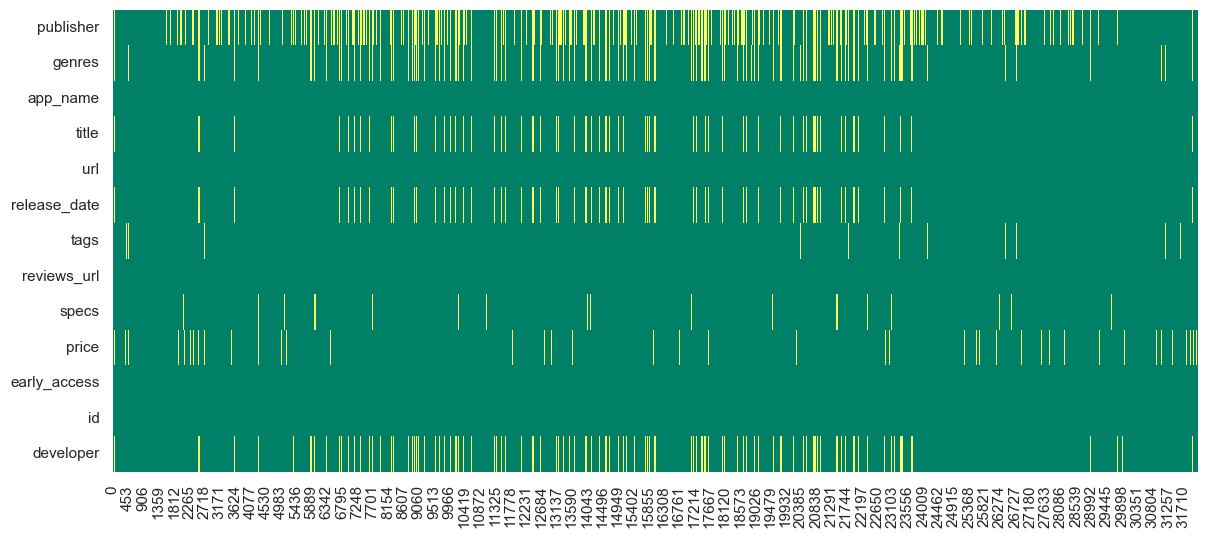

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(df_games.isnull().T, cmap= 'summer', cbar= False)
plt.show()

In [11]:
df_games.isnull().sum()

publisher       8070
genres          3282
app_name           1
title           2049
url                0
release_date    2066
tags             162
reviews_url        1
specs            669
price           1377
early_access       0
id                 1
developer       3298
dtype: int64

In [10]:
df_games.dtypes

publisher        object
genres           object
app_name         object
title            object
url              object
release_date     object
tags             object
reviews_url      object
specs            object
price            object
early_access       bool
id              float64
developer        object
dtype: object

In [13]:
df_games.head(2)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL


In [17]:
rows = []
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for register in df_games['release_date']:
    try:
        rows.append(datetime.datetime.strptime(register, '%Y-%m-%d'))
    except (ValueError, SyntaxError, TypeError):
        if type(register) != str:
            rows.append(np.nan)
        else:
            lista_Error = []
            cadena = ''
            for letter in register:
                if letter == ' ':
                    lista_Error.append(cadena)
                    cadena = ''
                elif letter != ' ':
                    cadena = cadena + letter
            lista_Error.append(cadena)
            for n, element in enumerate(lista_Error):
                for m, month in enumerate(months):
                    if month in element:
                        
                        if len(str(m + 1)) == 1:
                            lista_Error[n] = str('0' + str(m + 1))
                            i_month = str('0' + str(m + 1))
                        else:
                            lista_Error[n] = str(m + 1)
                            i_month = str(m + 1)
            register2 = "-".join(lista_Error)
            # print(register2, '/', register)
            try:
                for n, element in enumerate(lista_Error):
                    if len(str(element)) == 4:
                        try:
                            g = int(element)
                            year = str(element)
                        except ValueError:
                            rows.append(np.nan)
                lista_f = ['01', str(i_month), year]
                register3 = '-'.join(lista_f)
                print(register3)
                try:
                    rows.append(datetime.datetime.strptime(register3, '%d-%m-%Y'))
                except TypeError:
                    rows.append(np.nan)
            except NameError:
                print(register2)
                rows.append(np.nan)

01-01-2018
01-01-2017
01-01-2017
01-06-2009
01-10-2010
01-10-2010
01-10-2010
01-02-2011
01-08-2014
01-08-2014
01-08-2014
01-08-2014
01-08-2014
01-08-2014
01-09-2014
01-04-2015
01-04-2015
01-04-2017
01-04-2017
01-04-2016
01-07-2016
01-06-2016
01-06-2016
01-06-2017
01-06-2017
01-06-2017
01-06-2017
01-06-2017
01-06-2017
01-06-2018
01-06-2018
01-06-2017
01-06-2017
01-06-2018
01-06-2017
01-06-2017
01-03-2018
01-03-2018
01-07-2018
01-07-2017
01-07-2017
01-07-2018
01-07-2017
01-07-2017
01-07-2017
01-07-2017
01-07-2018
01-07-2018
01-07-2018
01-07-2018
01-10-2017
01-10-2017
01-10-2017
01-10-2017
01-10-2018
01-10-2018
01-10-2017
01-10-2017
01-10-2017
01-10-2017
01-10-2017
01-11-2017
01-11-2017
01-11-2017
01-11-2017
01-11-2017
01-11-2018
01-11-2018
01-12-2017
01-12-2018
01-12-2018
01-12-2017
01-12-2018
01-12-2018
01-12-2018
01-06-2017
01-06-2017
01-06-2017
01-06-2017
01-12-2017
01-12-2017
01-12-2017
01-12-2018
01-12-2018
01-02-2018
01-02-2018
01-02-2018
01-02-2018
01-08-2017
01-12-2017
01-12-2018

In [18]:
print(df_games.shape[0], len(rows))

32134 32215
